In [1]:
import pandas as pd
import numpy as np

In [2]:
nasdaq_100_returns = pd.read_csv('../data/nasdaq_100_returns.csv', parse_dates=True, index_col='date')

In [3]:
dates_to_predict = nasdaq_100_returns.iloc[-10::-10].index

In [4]:
predictions = pd.read_csv('../data/predictions.csv', parse_dates=True, index_col=0).T

In [5]:
def built_comp_list(predictions, n=1):
    cmp_dict = {}
    for dt in predictions.columns:
        dt_serie = predictions[dt].sort_values(ascending=False)
        dt_serie_non_zero = dt_serie[dt_serie != 0]
        comp_list = list(dt_serie_non_zero.head(n).index)
        cmp_dict[dt.strftime('%Y-%m-%d')] = comp_list
    return cmp_dict
    

In [6]:
def bckt_time_window(dt, bck_test_df, comp_list):
    comp_series = {}
    for comp in bck_test_df.columns:
        if comp in comp_list:
            comp_series[comp] = bck_test_df[comp][dt:].head(10).sort_index(ascending=False)
        else:
            comp_series[comp] = pd.Series(index=bck_test_df[dt:].head(10).index, data = np.nan)
    return pd.DataFrame(comp_series)

In [7]:
N = 5

In [8]:
top_n = built_comp_list(predictions, n=N)

In [9]:
window_list = []
for dt, comp_list in top_n.items():
    window_list.append(bckt_time_window(dt, nasdaq_100_returns, comp_list))

In [10]:
avg_ret = pd.DataFrame(pd.concat(window_list).mean(axis = 1).sort_index(), columns=['avg_return'])

In [11]:
returns = avg_ret.merge(nasdaq_100_returns['NDX'], left_index=True, right_index=True, how='inner') +1

In [12]:
final_ret = returns.fillna(value=1)

In [14]:
final_ret

,avg_return,NDX
date,,
2019-05-17,0.978168,0.989913
2019-05-20,0.967962,0.983078
2019-05-21,1.013102,1.010075
2019-05-22,0.982242,0.995925
2019-05-23,0.987810,0.984809
...,...,...
2021-02-08,1.016419,1.006694
2021-02-09,1.001501,0.999420
2021-02-10,0.992718,0.997676


In [23]:
result = final_ret.to_json(orient="records")
result

'[{"avg_return":0.9839931874,"NDX":0.9899131151},{"avg_return":0.9736446573,"NDX":0.9830780364},{"avg_return":1.0203735218,"NDX":1.010074555},{"avg_return":0.9920881926,"NDX":0.9959253901},{"avg_return":0.9902069012,"NDX":0.9848086289},{"avg_return":0.9976828553,"NDX":0.9990462415},{"avg_return":0.9960323182,"NDX":0.996907256},{"avg_return":0.9959715721,"NDX":0.9915475697},{"avg_return":1.0077004443,"NDX":1.0039546285},{"avg_return":0.9857140592,"NDX":0.983791095},{"avg_return":0.9875773404,"NDX":0.9789645284},{"avg_return":1.0317443923,"NDX":1.0270463541},{"avg_return":1.0065166671,"NDX":1.0075557261},{"avg_return":1.003079012,"NDX":1.0076209337},{"avg_return":1.0186161069,"NDX":1.0194284442},{"avg_return":1.018414912,"NDX":1.0114111758},{"avg_return":0.9979299725,"NDX":1.0015889245},{"avg_return":1.0060229766,"NDX":0.9944688808},{"avg_return":1.0059278638,"NDX":1.0051376486},{"avg_return":0.9953080448,"NDX":0.9957966522},{"avg_return":0.9909666542,"NDX":1.0063389895},{"avg_return":1.

In [24]:
parsed = json.loads(result)
parsed

[{'avg_return': 0.9839931874, 'NDX': 0.9899131151},
 {'avg_return': 0.9736446573, 'NDX': 0.9830780364},
 {'avg_return': 1.0203735218, 'NDX': 1.010074555},
 {'avg_return': 0.9920881926, 'NDX': 0.9959253901},
 {'avg_return': 0.9902069012, 'NDX': 0.9848086289},
 {'avg_return': 0.9976828553, 'NDX': 0.9990462415},
 {'avg_return': 0.9960323182, 'NDX': 0.996907256},
 {'avg_return': 0.9959715721, 'NDX': 0.9915475697},
 {'avg_return': 1.0077004443, 'NDX': 1.0039546285},
 {'avg_return': 0.9857140592, 'NDX': 0.983791095},
 {'avg_return': 0.9875773404, 'NDX': 0.9789645284},
 {'avg_return': 1.0317443923, 'NDX': 1.0270463541},
 {'avg_return': 1.0065166671, 'NDX': 1.0075557261},
 {'avg_return': 1.003079012, 'NDX': 1.0076209337},
 {'avg_return': 1.0186161069, 'NDX': 1.0194284442},
 {'avg_return': 1.018414912, 'NDX': 1.0114111758},
 {'avg_return': 0.9979299725, 'NDX': 1.0015889245},
 {'avg_return': 1.0060229766, 'NDX': 0.9944688808},
 {'avg_return': 1.0059278638, 'NDX': 1.0051376486},
 {'avg_return': 0

In [16]:
final_ret.index.values

array(['2019-05-17T00:00:00.000000000', '2019-05-20T00:00:00.000000000',
       '2019-05-21T00:00:00.000000000', '2019-05-22T00:00:00.000000000',
       '2019-05-23T00:00:00.000000000', '2019-05-24T00:00:00.000000000',
       '2019-05-28T00:00:00.000000000', '2019-05-29T00:00:00.000000000',
       '2019-05-30T00:00:00.000000000', '2019-05-31T00:00:00.000000000',
       '2019-06-03T00:00:00.000000000', '2019-06-04T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-06-06T00:00:00.000000000',
       '2019-06-07T00:00:00.000000000', '2019-06-10T00:00:00.000000000',
       '2019-06-11T00:00:00.000000000', '2019-06-12T00:00:00.000000000',
       '2019-06-13T00:00:00.000000000', '2019-06-14T00:00:00.000000000',
       '2019-06-17T00:00:00.000000000', '2019-06-18T00:00:00.000000000',
       '2019-06-19T00:00:00.000000000', '2019-06-20T00:00:00.000000000',
       '2019-06-21T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-06-25T00:00:00.000000000', '2019-06-26

In [18]:
response = {
    'date': final_ret.index.values,
    'avg_return': final_ret.avg_return.values,
    'NDX': final_ret.NDX.values
}


response

{'date': array(['2019-05-17T00:00:00.000000000', '2019-05-20T00:00:00.000000000',
        '2019-05-21T00:00:00.000000000', '2019-05-22T00:00:00.000000000',
        '2019-05-23T00:00:00.000000000', '2019-05-24T00:00:00.000000000',
        '2019-05-28T00:00:00.000000000', '2019-05-29T00:00:00.000000000',
        '2019-05-30T00:00:00.000000000', '2019-05-31T00:00:00.000000000',
        '2019-06-03T00:00:00.000000000', '2019-06-04T00:00:00.000000000',
        '2019-06-05T00:00:00.000000000', '2019-06-06T00:00:00.000000000',
        '2019-06-07T00:00:00.000000000', '2019-06-10T00:00:00.000000000',
        '2019-06-11T00:00:00.000000000', '2019-06-12T00:00:00.000000000',
        '2019-06-13T00:00:00.000000000', '2019-06-14T00:00:00.000000000',
        '2019-06-17T00:00:00.000000000', '2019-06-18T00:00:00.000000000',
        '2019-06-19T00:00:00.000000000', '2019-06-20T00:00:00.000000000',
        '2019-06-21T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
        '2019-06-25T00:00:00.0

<AxesSubplot:xlabel='date'>

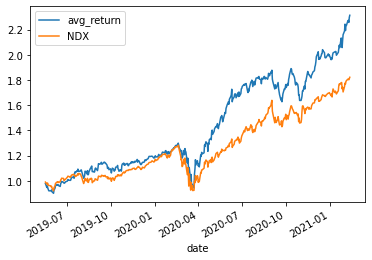

In [13]:
final_ret.cumprod().plot()

## Cache Examples

In [20]:
import json

for N in range(1, 11, 1):
    top_n = built_comp_list(predictions, n=N)
    window_list = []
    for dt, comp_list in top_n.items():
        window_list.append(bckt_time_window(dt, nasdaq_100_returns, comp_list))

    avg_ret = pd.DataFrame(pd.concat(window_list).mean(axis = 1).sort_index(), columns=['avg_return'])

    returns = avg_ret.merge(nasdaq_100_returns['NDX'], left_index=True, right_index=True, how='inner') +1
    final_ret = returns.fillna(value=1)

    response =  {
        'date': final_ret.index.values.tolist(),
        'avg_return': final_ret.avg_return.values.tolist(),
        'NDX': final_ret.NDX.values.tolist()
    } 
    
    filename = f'../cache/N{N}.txt'
    with open(filename, 'w') as outfile:
        json.dump(response, outfile)
    
    

In [25]:
import json

for N in range(1, 11, 1):
    top_n = built_comp_list(predictions, n=N)
    window_list = []
    for dt, comp_list in top_n.items():
        window_list.append(bckt_time_window(dt, nasdaq_100_returns, comp_list))

    avg_ret = pd.DataFrame(pd.concat(window_list).mean(axis = 1).sort_index(), columns=['avg_return'])

    returns = avg_ret.merge(nasdaq_100_returns['NDX'], left_index=True, right_index=True, how='inner') +1
    final_ret = returns.fillna(value=1)

    result = final_ret.to_json(orient="records")
    response = json.loads(result)
    
    filename = f'../cache_format2/N{N}.txt'
    with open(filename, 'w') as outfile:
        json.dump(response, outfile)
    
    